In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
from scipy.stats import norm
import seaborn as sns
import itertools

In [2]:
df= pd.read_csv("df_top10.csv")

<ipython-input-2-75406a29420f>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("df_top10.csv")


In [4]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [3]:
df

,Unnamed: 0,Jurisdiction,Kind,Display Key,Lens ID,Publication Date,Publication Year,Application Number,Application Date,Title,Applicants,Inventors,Owners,CPC Classifications,IPCR Classifications,Legal Status,num_inventors,Abstract
0,0,PL,T3,PL 3366415 T3,004-922-905-812-852,2023-03-06,2023.0,PL 18155149 T,2018-02-05,METHOD OF BRAZING A TREATMENT AREA OF A LOAD-B...,GEN ELECTRIC,HENDERSON BRIAN LESLIE;;CUI YAN;;DORRIETY DANI...,NaN,B23K1/0018;;B23K1/19;;B23P6/002;;B23P6/007;;F0...,B23P6/00;;B23K1/00;;B23K1/002;;B23K1/19;;B23P6...,PENDING,5.0,NaN
1,1,JP,A,JP H1149729 A,005-125-037-091-331,1999-02-23,1999.0,JP 11763998 A,1998-04-28,DIAMINOALKYL QUATERNARY AMMONIUM SALT AND ITS ...,GEN ELECTRIC,BRUNELLE DANIEL JOSEPH;;PHELPS PETER DAVID;;BO...,NaN,C07D295/13;;C07D295/13;;C07C211/63;;C07C211/63...,C07D295/02;;B01J31/02;;C07B61/00;;C07C68/02;;C...,EXPIRED,7.0,NaN
2,2,US,A1,US 2014/0260277 A1,005-687-980-456-121,2014-09-18,2014.0,US 201313845485 A,2013-03-18,FLOW SLEEVE FOR A COMBUSTION MODULE OF A GAS T...,GEN ELECTRIC,DICINTIO RICHARD MARTIN;;MELTON PATRICK BENEDI...,GENERAL ELECTRIC COMPANY (2013-03-15),F23R3/005;;F23R3/46;;F23R3/60;;F23R2900/00017;...,F23R3/20,ACTIVE,5.0,NaN
3,3,US,B2,US 9771874 B2,003-293-180-240-758,2017-09-26,2017.0,US 201414546512 A,2014-11-18,Power output and fuel flow based probabilistic...,GEN ELECTRIC,DAVIS JR LEWIS BERKLEY;;DAY SCOTT ARTHUR;;JORD...,GENERAL ELECTRIC COMPANY (2014-11-04),F02C9/28;;F02C9/28;;F02C3/04;;F02C3/04;;F05D22...,F02C9/28;;F02C3/04,ACTIVE,4.0,NaN
4,4,US,B2,US 9022730 B2,006-895-858-946-20X,2015-05-05,2015.0,US 90101010 A,2010-10-08,Supersonic compressor startup support system,GEN ELECTRIC,VYSOHLID MARTIN;;HOFER DOUGLAS CARL,GENERAL ELECTRIC COMPANY (2010-10-06),F04D21/00;;F04D21/00;;F04D27/02;;F04D27/02,F04D21/00;;F04D27/02,ACTIVE,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352740,352740,US,B2,US 8559504 B2,160-523-862-185-219,2013-10-15,2013.0,US 201213706981 A,2012-12-06,Method and apparatus for coding image informat...,SONY CORP,SATO KAZUSHI;;SUNOHARA OSAMU;;SUZUKI TERUHIKO;...,NaN,H04N19/61;;H04N19/60;;H04N19/126;;H04N19/186;;...,H04B1/66;;G06T9/00;;H04N7/26;;H04N7/50,EXPIRED,NaN,NaN
352741,352741,CN,A,CN 105474589 A,165-886-896-198-856,2016-04-06,2016.0,CN 201480044708 A,2014-07-02,Communications terminal and method,SONY CORP,WAKABAYASHI HIDEJI;;WEBB MATTHEW WILLIAM,NaN,H04L47/2416;;H04L47/30;;H04W28/0231;;H04W52/02...,H04L47/2416;;H04L47/30;;H04L47/32,ACTIVE,NaN,NaN
352742,352742,EP,B1,EP 3167642 B1,159-091-921-310-111,2020-03-11,2020.0,EP 15731130 A,2015-06-08,APPARATUS AND METHOD FOR PERFORMING SPECTRUM S...,SONY CORP,FURUICHI SHO;;TSUDA SHINICHIRO;;SAWAI RYO,NaN,H04W16/14;;H04W64/003;;H04W16/14;;H04W64/003;;...,H04W16/14;;H04W4/021;;H04W64/00,ACTIVE,NaN,NaN
352743,352743,JP,A,JP 2012010311 A,157-895-918-185-015,2012-01-12,2012.0,JP 2011061549 A,2011-03-18,"TRANSMITTER, TRANSMISSION METHOD, RECEIVER, RE...",SONY CORP,TSUKAGOSHI IKUO,NaN,H04N13/183;;H04N13/183;;H04N7/24;;H04N7/24;;H0...,H04N7/173;;G10L19/00;;H04N13/00;;H04N21/442,PENDING,NaN,NaN


In [121]:
def generate_inventor_pairs(inventor_list):
    pairs = list(itertools.combinations(inventor_list, 2))
    return pairs

In [160]:
# Creazione coppie inventori per costruire il grafo bipartito
pair_counts = {}

for index, row in df.iterrows():
    inventors = row['Inventors']
    
    if pd.isna(inventors) or not isinstance(inventors, str):
        continue
    
    inventors = inventors.split(';;')
    pairs = generate_inventor_pairs(inventors)
    
    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1
    

new_rows = []

for pair, count in pair_counts.items():
    source, target = pair
    new_rows.append({'Source': source, 'Target': target, 'Weight': count})

new_df = pd.DataFrame(new_rows)

In [161]:
new_df.sort_values('Weight',ascending=False)

,Source,Target,Weight
235815,CHENG KANGGUO,KHAKIFIROOZ ALI,1111
345424,ALSHINA ELENA,ALSHIN ALEXANDER,784
346715,HWANG SUNG-HEE,KO JUNG-WAN,782
345662,LEE TAMMY,HAN WOO-JIN,771
235817,CHENG KANGGUO,REZNICEK ALEXANDER,758
...,...,...,...
222400,HOTTA TAKASHI,KURITA KIMISABURO,1
222401,HOTTA TAKASHI,AGANO MASAHIRO,1
222402,MASUDA KAO,IWAMURA MASAHIRO,1
222403,MASUDA KAO,KURITA KIMISABURO,1


In [162]:
colonna_da_confrontare = "Weight"
new_df = new_df[new_df[colonna_da_confrontare] >= 13]
#new_df = new_df[new_df[colonna_da_confrontare] <= 500]

In [163]:
new_df.sort_values('Weight',ascending=False)

,Source,Target,Weight
235815,CHENG KANGGUO,KHAKIFIROOZ ALI,1111
345424,ALSHINA ELENA,ALSHIN ALEXANDER,784
346715,HWANG SUNG-HEE,KO JUNG-WAN,782
345662,LEE TAMMY,HAN WOO-JIN,771
235817,CHENG KANGGUO,REZNICEK ALEXANDER,758
...,...,...,...
383578,TAKI YUHEI,SHIRAI TAIZO,13
327911,MORIGAKI KENICHI,KOBAYASHI SHIGEO,13
327922,FUJITA MAYUMI,NANKAI SHIRO,13
241957,DUNNE JONATHAN,GRANT ROBERT H,13


In [126]:
df_filtered = new_df[new_df['Weight'] <50]
print(df_filtered)

                        Source                 Target  Weight
0       HENDERSON BRIAN LESLIE                CUI YAN      28
1       HENDERSON BRIAN LESLIE  DORRIETY DANIEL JAMES      28
3       HENDERSON BRIAN LESLIE       COOK PAUL ALBERT      28
6                      CUI YAN       COOK PAUL ALBERT      26
8        DORRIETY DANIEL JAMES       COOK PAUL ALBERT      26
...                        ...                    ...     ...
399859             IJAZ AYESHA   KAHTAVA JUSSI TAPANI      16
400128       YAMAGISHI YASUAKI       KIKKAWA NORIFUMI      13
400170              IWAKI YUJI      KOBAYASHI TOSHIRO      14
400927            INOUE HAJIME           SHIMA HISATO      14
400939       MATSUMOTO ATSUSHI    NISHIGUCHI MASAYUKI      17

[41681 rows x 3 columns]


In [127]:
conteggio = new_df['Source'].value_counts()

print(conteggio)

Source
SAKO YOICHIRO                        126
CHENG KANGGUO                        112
KONDO TETSUJIRO                      103
BEWLAY BERNARD PATRICK                91
KUMAR AJITH KUTTANNAIR                84
                                    ... 
ABD EL-NABI BASSAM SABRY MOHAMMAD      1
CHAUDHURI NILANJAN RAY                 1
AGRAWAL TUSHAR                         1
JIA TAO                                1
BALL DAVID WESLEY                      1
Name: count, Length: 9615, dtype: int64


In [128]:
conteggio = new_df['Weight'].value_counts()
print(conteggio)

Weight
14     4842
16     3528
13     3414
18     2706
15     2493
       ... 
348       1
499       1
372       1
263       1
312       1
Name: count, Length: 416, dtype: int64


In [130]:
def plot_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

In [131]:
G_test=nx.Graph()
for _, row in new_df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    
    G_test.add_node(source)
    G_test.add_node(target)
    
    G_test.add_edge(source, target, weight=weight)
    



In [132]:
print("Number of Nodes: ", G_test.order()) # equivalent to len(G) and G.number_of_nodes()
print("Number of Edges: ", G_test.number_of_edges())

Number of Nodes:  12486
Number of Edges:  40795


In [133]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,49129.0,34.198111,40.264395,13.0,16.0,22.0,36.0,1111.0


In [135]:
#Per selezionare le relazioni più significative impostiamo una soglia in base alla distribuzione dei pesi

In [136]:
weight= new_df['Weight'].values

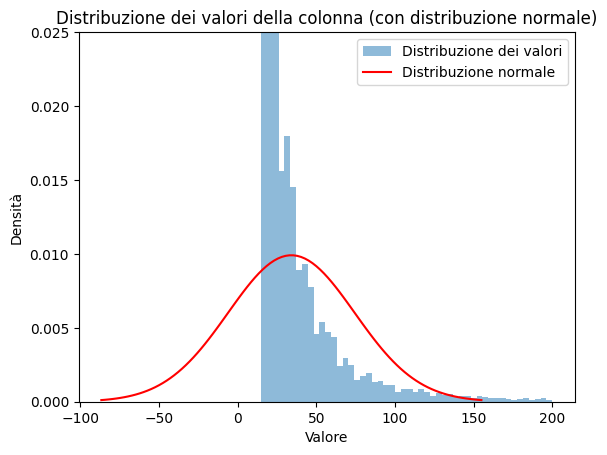

In [137]:
media = np.mean(weight)
deviazione_standard = np.std(weight)
x = np.linspace(media - 3 * deviazione_standard, media + 3 * deviazione_standard, 100)
y = norm.pdf(x, media, deviazione_standard)

plt.hist(weight, bins=50, density=True, alpha=0.5, range=(15, 200), label='Distribuzione dei valori')
plt.ylim(0, 0.025)

plt.plot(x, y, 'r', label='Distribuzione normale')

plt.xlabel('Valore')
plt.ylabel('Densità')
plt.title('Distribuzione dei valori della colonna (con distribuzione normale)')
plt.legend()
plt.show()
